# Intro

Let's say you run a test with *n* trials (e.g. sessions) and *a* successes (e.g. conversions), and you want to figure out the distribution of possible values for *p* (e.g. conversion rate).

For instance, what's a range of likely values if you run this test again? This calculator will help.

--

See [here](https://www.countbayesie.com/blog/2015/3/17/interrogating-probability-distributions) for an introduction to beta distributions, and [here](https://www.countbayesie.com/blog/2015/4/4/parameter-estimation-the-pdf-cdf-and-quantile-function) for an application of this to confidence intervals.

# Beta Distribution Calculator

Fill out the input values in the second cell below, and then hover over each code cell in order and press the play icon - where there is output, that will update.

In [0]:
# See https://www.countbayesie.com/blog/2015/4/4/parameter-estimation-the-pdf-cdf-and-quantile-function
# http://stats.stackexchange.com/questions/47771/what-is-the-intuition-behind-beta-distribution/47782#47782
from scipy.special import btdtr,btdtri
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

In [0]:
# Input number of trials, number of successes, and forecast trials (e.g. for next month)
trials = 2099
successes = 135
forecast_trials = 2099

In [0]:
# Use beta distribution to give median and confidence intervals
a = successes
b = trials - a
lower_bound = btdtri(a,b,0.025)
median = btdtri(a,b,0.5)
upper_bound = btdtri(a,b,0.975)

print("p vals")
print("======")
print("Lower bound: %.4f" % lower_bound)
print("Median:      %.4f" % median)
print("Upper bound: %.4f\n" % upper_bound)

print("Forecast successes (for #forecast trials = %d)" % forecast_trials)
print("==================")
print("Lower bound: %.0f" % (lower_bound * forecast_trials))
print("Median:      %.0f" % (median * forecast_trials))
print("Upper bound: %.0f" % (upper_bound * forecast_trials))

p vals
Lower bound: 0.0542
Median:      0.0642
Upper bound: 0.0752

Forecast successes (for #forecast trials = 2099)
Lower bound: 114
Median:      135
Upper bound: 158


Viewed another way, you can also represent the range of likely p values using a probability density function:

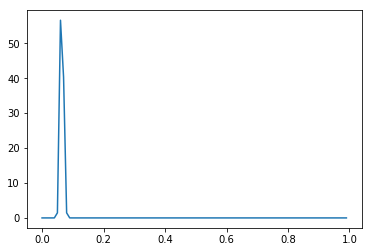

In [0]:
# Probability density function (pdf) - read x axis as the p value
# y axis scales so that the area under the graph sums to 1
x = np.arange(0.00, 1, 0.01)
y = beta.pdf(x,a,b)
plt.plot(x,y)

Or cumulatively as a cumulative density function:

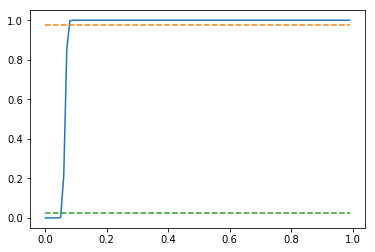

In [0]:
# Cumulative density function with 95% confidence bounds
# x axis is the p value, y axis is the cumulative area under the pdf
y = beta.cdf(x,a,b)
plt.plot(x,y)
upper_bound = np.full((100,1),0.975)
lower_bound = np.full((100,1),0.025)
plt.plot(x,upper_bound,linestyle='dashed')
plt.plot(x,lower_bound,linestyle='dashed')